In [35]:
import numpy as np
import matplotlib.pyplot as plt
import os
import seaborn as sns

sns.set_style("white")

current_dir = os.path.abspath("")
data_dir = os.path.abspath("../Lectures/Data")

data_dir, current_dir

('c:\\Users\\user\\Documents\\Skola\\Deep-Learning\\Lectures\\Data',
 'c:\\Users\\user\\Documents\\Skola\\Deep-Learning\\Lectures')

(390, 190, 4)

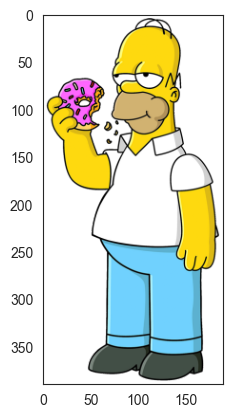

In [36]:
img = plt.imread(f"{data_dir}/Homer_Simpson_2006.png")
plt.imshow(img)
img.shape

(-0.5, 94.5, 194.5, -0.5)

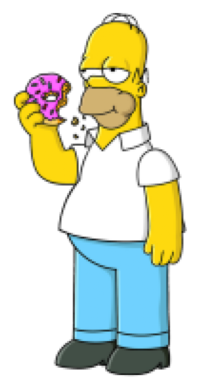

In [37]:
import cv2
resize_factor = .5
new_size = int(img.shape[1]*resize_factor), int(img.shape[0]*resize_factor)

img = cv2.resize(img, new_size)
plt.imshow(img)
plt.axis("off")


In [38]:
edge_filter = np.array([[0, -1, 0],
                         [-1, 4, -1],
                         [0, -1, 0]])

blur_filter = np.array([[0.625, .125, .0625],
                        [.125, .25, .125],
                        [.0625, .125, .0625]])

outline_filter = np.array([[-1, -1, -1],
                            [-1, 6, -1],
                            [-1, -1, -1]])

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


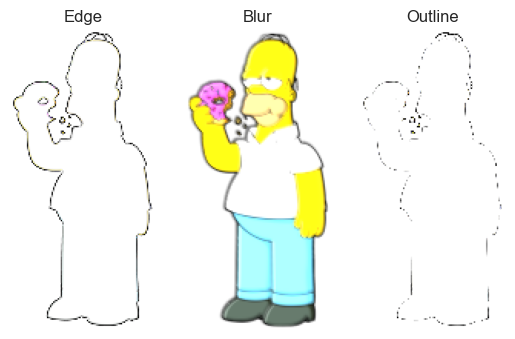

In [39]:
processed_images_path = f"{data_dir}/processed_images"
filters = [edge_filter, blur_filter, outline_filter]
filter_names = ["Edge", "Blur", "Outline"]
try:
    os.mkdir(processed_images_path)
except FileExistsError as err:
    pass
fig, axes = plt.subplots(1, len(filters))

for ax, filter, filter_name in zip(axes, filters, filter_names):
    filtered_img = cv2.filter2D(img, -1, kernel=filter)
    ax.imshow(filtered_img)
    ax.axis("off")
    ax.set(title=f"{filter_name}")

fig.savefig(f"{processed_images_path}/Filtered_images.png")

In [41]:
import keras
from keras import layers

(X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data()
X_train = X_train.reshape((60000, 28, 28, 1))
X_train = X_train.astype("float32") / 255
X_test = X_test.reshape((10000, 28, 28, 1))
X_test = X_test.astype("float32") / 255

inputs = keras.Input(shape=(28, 28, 1))
x = layers.Conv2D(filters=32, kernel_size=3, activation="relu")(inputs)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=128, kernel_size=3, activation="relu")(x)
x = layers.Flatten()(x)
outputs = layers.Dense(10, activation="softmax")(x)
model = keras.Model(inputs=inputs, outputs=outputs)
model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 28, 28, 1)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 3, 3, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1152)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 10)             │        11,530 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 104,202 (407.04 KB)

 Trainable params: 104,202 (407.04 KB)

 Non-trainable params: 0 (0.00 B)

In [42]:
model.compile(optimizer="rmsprop", 
              loss="sparse_categorical_crossentropy", metrics=["accuracy"])
model.fit(X_train, y_train, epochs=5, batch_size=64)

Epoch 1/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 48s 49ms/step - accuracy: 0.8788 - loss: 0.3833
Epoch 2/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 45s 48ms/step - accuracy: 0.9851 - loss: 0.0478
Epoch 3/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 49s 52ms/step - accuracy: 0.9897 - loss: 0.0323
Epoch 4/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 79s 49ms/step - accuracy: 0.9932 - loss: 0.0219
Epoch 5/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 82s 49ms/step - accuracy: 0.9957 - loss: 0.0147


In [43]:
test_loss, test_acc = model.evaluate(X_test, y_test)
(test_loss, test_acc)

313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - accuracy: 0.9888 - loss: 0.0336


(0.025170253589749336, 0.9915000200271606)